# Lab | Data Cleaning Bonus Challenge
### The objectives of this lab are:

##### Know the Iris Dataset (you will use it tomorrow)
##### Review cleaning concepts
##### Introduction

### As you know, data comes with a lot of errors. In this lab we propose you a challenge. We have purposely added some errors to the famous Iris flower dataset. Let's take a look on the data and fix some possible errors as:

##### Data is encoded properly.

##### Data falls within the expected range, and use domain knowledge whenever possible to define that expected range.

##### Deal with missing data in one way or another: replace it if you can or drop it.

### Some advices:
##### Never tidy your data manually because that is not easily reproducible

##### Use code as a record of how you tidied your data

##### Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

### Deliverables
##### A notebook with the code you used to clean the data.
##### The final data in a csv.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('iris-data.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


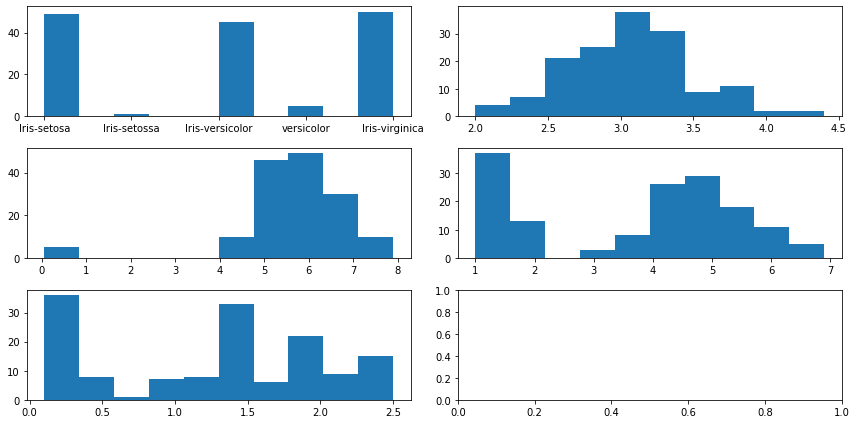

In [22]:
fig, axs = plt.subplots(3,2, figsize=(12,6))

axs[0,0].hist(df['class'])
axs[0,1].hist(df['sepal_width_cm'])
axs[1,0].hist(df['sepal_length_cm'])
axs[1,1].hist(df['petal_length_cm'])
axs[2,0].hist(df['petal_width_cm'])
plt.tight_layout()
plt.show()


In [23]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [24]:
df[df['class'] == 'versicolor'].index

Int64Index([95, 96, 97, 98, 99], dtype='int64')

In [25]:
df.iloc[18, df.columns.get_loc('class')] = 'Iris-setosa'

In [26]:
df.iloc[[95, 96, 97, 98, 99], df.columns.get_loc('class')] = 'Iris-versicolor'

In [27]:
df = pd.concat([df, pd.get_dummies(df['class'])], axis=1)

In [28]:
df.drop('class', axis=1, inplace=True)

In [29]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,145.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.236552,0.333333,0.333333,0.333333
std,1.312781,0.433123,1.764420,0.755058,0.472984,0.472984,0.472984
min,0.055000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.700000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [30]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [31]:
df['sepal_length_cm'].sort_values()[df['sepal_length_cm'].sort_values()<4.3].index

Int64Index([81, 80, 79, 78, 77], dtype='int64')

In [32]:
df['sepal_length_cm'].sort_values()[df['sepal_length_cm'].sort_values()>7.9].index

Int64Index([], dtype='int64')

In [33]:
df.iloc[[81, 80, 79, 78, 77], df.columns.get_loc('sepal_length_cm')] = np.NaN

In [34]:
#df['sepal_width_cm'].sort_values()[df['sepal_width_cm'].sort_values()<2]

In [35]:
#df['sepal_width_cm'].sort_values()[df['sepal_width_cm'].sort_values()>4.4]

In [36]:
#df['petal_width_cm'].sort_values()[df['petal_width_cm'].sort_values()<0.1]

In [37]:
#df['petal_width_cm'].sort_values()[df['petal_width_cm'].sort_values()>2.5]

In [38]:
#df['petal_length_cm'].sort_values()[df['petal_length_cm'].sort_values()<1]

In [39]:
#df['petal_length_cm'].sort_values()[df['petal_length_cm'].sort_values()>6.9]

In [40]:
df.isna().sum()

sepal_length_cm    5
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
Iris-setosa        0
Iris-versicolor    0
Iris-virginica     0
dtype: int64

In [41]:
df = df.fillna(df['petal_width_cm'].mean())